# Praca domowa nr 6
## Justyna Jankowiak
Analiza algorytmów klastrowania dla różnych zbiorów danych.

In [1]:
import numpy as np
import pandas as pd
import seaborn
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
fm = pd.read_csv("benchmark_fm.csv", header = 0, index_col = 0)
fm

,kmeans_k,kmeans_r,birch,minibatch,spectral_k,spectral_d,agg_w,agg_cl,agg_al
digits2k_pixels,0.386115,0.361061,0.427011,0.303615,0.392192,0.466079,0.405951,0.191614,0.314864
iris,0.745211,0.745211,0.779938,0.745211,0.775520,0.741001,0.749782,0.751161,0.763517
iris5,0.675061,0.692352,0.679029,0.675061,0.564737,0.569168,0.666102,0.663127,0.690548
s1,0.986873,0.919085,0.857509,0.986906,0.980573,0.980573,0.984447,0.474364,0.436930
s2,0.942033,0.941310,0.816561,0.870222,0.932835,0.937232,0.921981,0.261733,0.256521
s3,0.743081,0.707443,0.698583,0.705542,0.746689,0.744639,0.706388,0.288143,0.256053
s4,0.658233,0.656039,0.587162,0.631804,0.627778,0.630138,0.611567,0.255932,0.256620
a1,0.920968,0.866419,0.556281,0.918847,0.936202,0.939078,0.895665,0.333535,0.340738
a2,0.956081,0.893221,0.489805,0.919434,0.929631,0.927199,0.934982,0.237073,0.345527
a3,0.948079,0.867501,0.464012,0.914042,0.967135,0.957375,0.940100,0.237764,0.176267


In [3]:
time = pd.read_csv("benchmark_time.csv", header = 0, index_col = 0)
time

,kmeans_k,kmeans_r,birch,minibatch,spectral_k,spectral_d,agg_w,agg_cl,agg_al
digits2k_pixels,2.616027,2.771111,6.682903,0.124775,6.881758,6.656476,0.637750,1.396230,1.587727
iris,0.022628,0.013466,0.004247,0.016830,0.038368,0.022874,0.011475,0.012631,0.018277
iris5,0.024219,0.020967,0.003604,0.012579,0.028212,0.014180,0.008141,0.009465,0.008983
s1,0.110493,0.199442,0.136349,0.100598,1.067410,0.967453,0.540883,0.541575,0.522007
s2,0.147653,0.274166,0.134246,0.099089,0.884831,0.695875,0.533059,0.469709,0.466872
s3,0.285243,0.329843,0.122626,0.041342,1.035571,0.693573,0.483717,0.438665,0.459673
s4,0.303608,0.440994,0.132741,0.040326,1.265839,0.919492,0.490556,0.433620,0.474607
a1,0.170399,0.167801,0.079728,0.117252,0.700077,0.480097,0.356102,0.339037,0.298121
a2,0.397034,0.518514,0.137760,0.151326,2.138998,1.298236,0.707110,0.626694,0.597249
a3,0.660653,0.901949,0.185775,0.237680,5.396022,2.935410,0.809344,0.756022,0.763186


## Najszybszy i najwolniejszy algorytm

W każdym wierszy ramki `time` porządkujemy dane i tworzymy nową ramkę z indeksami porządkowymi. Następnie sumujemy po kolumnach. Taka miara da nam informację o tym jak szybki jest algorytm. Im wieksza liczba przy danym algorytmie tym jest on wolniejszy (dla danego zbioru częściej był wolniejszy niż szybszy).

In [4]:
def summarise(df):
    nrows = df.shape[0]
    ncol = df.shape[1]
    order_array = np.zeros((nrows, ncol))
    for i in range(nrows):
        order_array[i] = df.iloc[[i]].squeeze().argsort()
    order_df = pd.DataFrame(order_array)
    order_series = order_df.sum()
    order_series.index = df.columns
    order_series.sort()
    return order_series

In [5]:
result_time = summarise(time)
result_time

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


kmeans_k       70
kmeans_r      104
birch         104
minibatch     108
spectral_k    110
agg_al        112
agg_w         124
agg_cl        133
spectral_d    143
dtype: float64

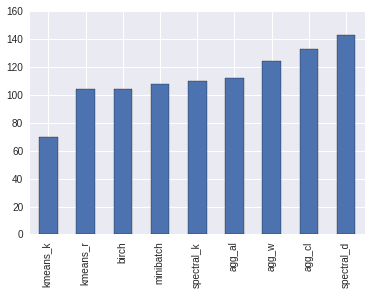

In [6]:
result_time.plot('bar')

Wyraźnie najszybszym algorytmem (średnio) jest algorytm `K-means` z metodą inicjalizacji `k-means++`. Najwolniejszy (średnio) jest algorytm `SpectralClustering` z parametrem `assign_labels =‘discretize’`

## Najbardziej i najmniej skuteczny algorytm
Podobnie jak poprzednio porządkujemy dane. Teraz najlepszym pod względem skuteczności algorytmem będzie ten z największym scorem, tzn. że jego skuteczność była raczej większa niż mniejsza w porównaniu z innymi,

In [7]:
result_fm = summarise(fm)
result_fm

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:10: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


birch          69
minibatch      84
agg_al         91
spectral_d     97
spectral_k    101
agg_w         106
agg_cl        115
kmeans_k      172
kmeans_r      173
dtype: float64

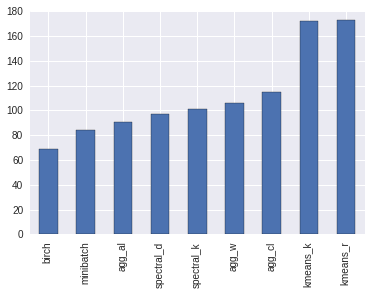

In [8]:
result_fm.plot('bar')

Najlepszym algorytmem jest algorytm `K-means` (różnica pomiędzy jego wersjami w zalężności od metody inicjalizacji jest prawie niezauważalna). Najmniej skutecznym algorytmem jest `birch`.

## Średnie skuteczności

In [9]:
means_fm = fm.mean().sort_values()
means_fm

agg_cl        0.537488
agg_al        0.561592
birch         0.750913
spectral_d    0.776272
spectral_k    0.780183
kmeans_r      0.793832
minibatch     0.796589
agg_w         0.819540
kmeans_k      0.823483
dtype: float64

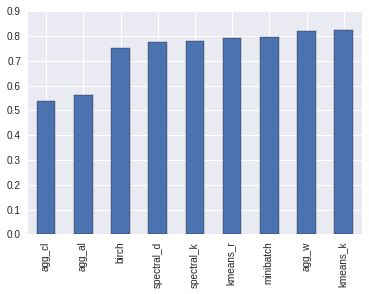

In [10]:
means_fm.plot('bar')

Obliczając jednak dokładnie średnią skutecznośc (co jest większą informacją niż tylko wysumowanie uporządkowania) `K-means` dalej działa najlepiej, ale zaraz po jest algorytm `AgglomerativeClustering` z parametrem `linkage='ward'`. Jednak algorytmy aglomeracyjne z innym parametrem `linkage` znalazły się na ostatnich dwóch pozycjach.

## Ilustracja działania
Działanie algorytmów w $R^2$ możemy przedstawić na wykresach. Porównamy tu kilka algorytmów dla zbioru `a1` (niektóre działają bardzo dobrze, iektóre zdecydowanie gorzej). 

In [12]:
data = np.loadtxt("example/a1.data.gz")
labels_real = np.loadtxt("example/a1.labels.gz")
labels_predicted = pd.read_csv("example/labels_a1.csv", header = 0)

In [13]:
data

array([[ 54620.,  43523.],
       [ 52694.,  42750.],
       [ 53253.,  43024.],
       ..., 
       [  8828.,  59102.],
       [  8879.,  59244.],
       [ 10002.,  61399.]])

In [14]:
labels_real

array([  1.,   1.,   1., ...,  20.,  20.,  20.])

In [15]:
labels_predicted.sample(10)

,kmeans_k,kmeans_r,birch,minibatch,spectral_k,spectral_d,agg_w,agg_cl,agg_al
783,15,9,2,11,17,19,11,3,0
2143,7,7,7,3,10,8,2,2,1
747,10,18,0,16,11,15,6,1,0
2121,7,7,7,3,10,8,2,2,1
2240,7,7,7,3,10,8,2,2,1
477,2,15,1,6,18,6,0,3,0
239,16,6,0,19,9,10,16,3,0
879,15,9,2,11,17,19,11,3,0
1325,14,17,3,12,2,18,13,3,0
21,18,13,0,2,15,14,15,3,0


### Prawdziwy zbiór
20 różnych wartości wyjściowych

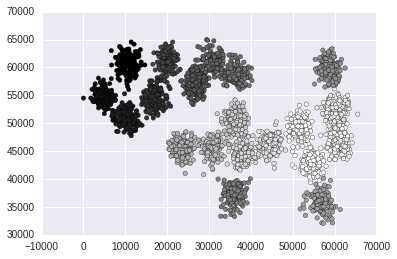

In [16]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c = labels_real)
plt.show()

In [17]:
np.unique(labels_real)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [18]:
pd.Series(labels_real).value_counts()

20    150
19    150
2     150
3     150
4     150
5     150
6     150
7     150
8     150
9     150
10    150
11    150
12    150
13    150
14    150
15    150
16    150
17    150
18    150
1     150
dtype: int64

### K-means - 92%

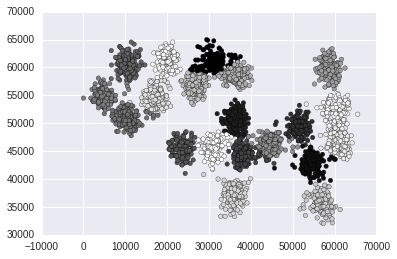

In [19]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c = labels_predicted.kmeans_k)
plt.show()

In [20]:
labels_predicted.kmeans_k.unique() # 20, czyli ok

array([18,  3, 16, 10,  2,  9, 15, 17,  0,  5, 14,  6, 19,  8,  7,  1,  4,
       12, 11, 13])

In [21]:
labels_predicted.kmeans_k.value_counts() # klasy mniej więcej o podobnej liczności jak oryginalny zbiór

19    160
12    158
0     155
18    154
15    151
9     151
5     151
2     151
11    150
7     149
17    149
6     148
10    148
13    148
14    148
16    148
1     147
4     147
3     146
8     141
Name: kmeans_k, dtype: int64

### Birch - 55%

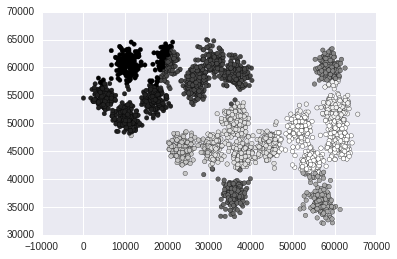

In [22]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c = labels_predicted.birch)
plt.show()

In [23]:
labels_predicted.birch.unique() 
#tylko 10 (mimo, że na wejściu dane było 20, ale widocznie łączył te najbardziej podobne)

array([0, 4, 1, 2, 6, 7, 3, 5, 9, 8])

In [24]:
labels_predicted.birch.value_counts()

2    551
7    544
0    458
8    432
9    225
3    171
4    168
1    155
6    155
5    141
Name: birch, dtype: int64

### Agg_cl

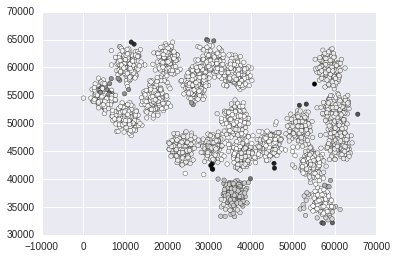

In [25]:
fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1], c = labels_predicted.agg_cl)
plt.show()

In [26]:
labels_predicted.agg_cl.unique() 
# jest 20, ale praktycznie większośc klas to są takie z pojedynczymi obserwacjami

array([ 3,  1, 15, 14, 17, 18,  0,  5,  8, 13, 19,  6,  4, 12,  7,  2, 11,
        9, 10, 16])

In [27]:
labels_predicted.agg_cl.value_counts() # uuuu, słabiutko

3     1178
2     1166
1      435
6      137
10      27
5       18
4        9
18       4
8        4
13       3
11       3
7        3
0        2
16       2
17       2
9        2
15       2
12       1
14       1
19       1
Name: agg_cl, dtype: int64